In [1]:
import numpy as np
from drone_sac import AgentParallel, BufferParallel
from drone_gym import DroneGym2
from tqdm.notebook import tqdm
import torch as T
import matplotlib.pyplot as plt

In [2]:
from distributed import Client, LocalCluster

n_workers  = 2
cl = Client(LocalCluster(n_workers=n_workers, threads_per_worker=1))
cl

Client Scheduler: tcp://127.0.0.1:57296 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 2 Memory: 15.94 GiB


In [3]:
env = DroneGym2.make()

In [25]:
score = 0
env.record_history = True
env.antiflip = False
for i in tqdm(range(1)):
    observation = env.reset()
    done = False
    score = 0
    while not done:
        action = np.random.uniform(0.98,1, size=2)
#         action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        score += reward
#         buffer.store_transition(observation, action, reward, observation_, done)
        observation = observation_
#     buffer.refresh()

  0%|          | 0/1 [00:00<?, ?it/s]

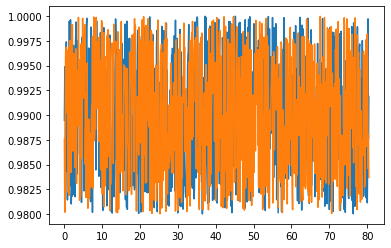

In [26]:
from ipywidgets import interact, interactive, fixed
import ipywidgets
import matplotlib.pyplot as plt
gym = env

xs = []
ys = []
f1s = []
f2s = []
rewards = []
ts = []
dts = []
scores = [0]
vels = []
for d in gym.history:
    gym.set_state(d['state'])
    xs.append(gym.drone.pos.x)
    ys.append(gym.drone.pos.y)
    f1, f2 = d['actions']
    f1s.append(f1)
    f2s.append(f2)
    ts.append(gym.time_curr)
    rewards.append(d['reward'])
    dts.append(d['delta_t1'])
    scores.append(scores[-1]+d['reward'])
    vels.append(gym.drone.vel.len())
scores = scores[1:]
i1=0
i2=-1
# plt.plot(ts[i1:i2], rewards[i1:i2])
plt.plot(ts[i1:i2], f1s[i1:i2])
plt.plot(ts[i1:i2], f2s[i1:i2])
# plt.plot(ts[i1:i2], dts[i1:i2])

In [27]:
@interact(i=ipywidgets.IntSlider(min=0,max=len(gym.history)-1,step=1, value=0),
         ideal_traj=ipywidgets.Checkbox(value=True, description ='ideal_traj'))
def plot_history(i,ideal_traj):
    d = gym.history[i]
    i1=0#max(0,i-30)
    i2=i+1
    gym.set_state(d['state'])
    fig, (ax, ax2, ax3) = plt.subplots(1,3, figsize=(14,7))
    gym.plot(ax, drone_mashtb=50, vec_mashtb=10, actions=d['actions'],ideal_traj=ideal_traj, missile_d=True, missile_vec_mshtb=10)
    ax.plot(xs[i1:i],ys[i1:i],ls=':')
    ax.set_aspect('equal', adjustable='box')
    
    
#     ax2.plot(ts[i1:i2], f1s[i1:i2])
#     ax2.plot(ts[i1:i2], f2s[i1:i2])
    ax2.grid()
    ax2.plot(ts[:i2], vels[:i2])
    
    ax3.plot(ts[:i2], rewards[:i2])
    ax3.grid()
    ax.grid()
    plt.show()

interactive(children=(IntSlider(value=0, description='i', max=804), Checkbox(value=True, description='ideal_tr…